In [1]:
from karateclub import Graph2Vec
from kuramoto import Kuramoto
from kuramoto.db_metrics import *
import networkx as nx
from sklearn.linear_model import LogisticRegression

In [2]:
nodes = 20
r = 50
num_samples = 100

df = gen_all(nodes, r, num_samples, edge_var="H", random_K=True, half_sync=False)
label = df['Concentrated']
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,s20_47,s20_48,s20_49,s20_50,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,0.061574,0.057182,0.045798,-0.056562,-0.054180,-0.028906,-0.017778,0.031663,-0.035025,-0.055783,...,0.572229,0.570410,0.568549,0.566648,33,20,2,5,5,1
1,0.005901,0.056611,-0.041968,0.025743,0.024107,-0.022824,0.004559,-0.052181,0.007186,-0.019509,...,5.622282,5.634930,5.647632,5.660386,32,20,2,5,5,1
2,-0.033448,-0.039402,-0.030124,-0.017657,-0.016309,0.035505,0.049037,-0.026411,-0.035909,0.002570,...,2.835666,2.833219,2.830730,2.828199,36,20,3,6,5,1
3,0.004698,-0.051098,0.060245,0.048949,-0.000711,0.036070,0.031174,0.054724,0.024861,-0.059544,...,5.409385,5.414776,5.420123,5.425426,102,20,8,13,2,1
4,0.038769,0.036280,-0.032815,0.026018,0.060663,0.006600,-0.045822,-0.053941,0.024560,0.021061,...,4.103203,4.092438,4.081711,4.071024,86,20,8,10,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.036545,-0.011223,-0.018393,-0.032088,0.032027,-0.051685,0.051353,0.004291,0.045794,0.047688,...,0.819001,0.825105,0.831068,0.836896,36,20,2,7,5,1
84,0.029555,-0.049675,0.003852,0.008295,0.037264,0.052034,-0.018398,-0.058429,-0.013429,0.060685,...,6.166229,6.156192,6.146249,6.136403,47,20,4,7,4,1
85,-0.018266,-0.055143,0.019163,-0.027104,-0.010055,-0.039106,-0.028134,0.016083,0.058988,0.022292,...,1.089703,1.080945,1.072148,1.063313,71,20,5,9,3,1
86,-0.001366,0.032857,-0.042524,-0.000638,-0.057526,-0.059532,0.045109,0.028836,-0.001888,-0.050828,...,1.377487,1.375437,1.373409,1.371403,157,20,12,19,2,1


In [3]:
df.columns = df.columns.astype(str)

In [4]:
df.to_parquet('datasets/kuramoto.parquet', index=None)

In [5]:
print(np.array(df['# Edges']).std())
print(sum(df['Concentrated']))

37.544684121525435
86


## Only Dynamics

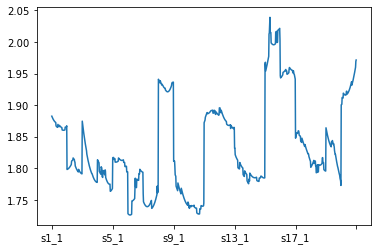

In [6]:
df1 = df.loc[:,'s1_1': f's{nodes}_{r}']
df1 = pd.concat([df1, label], axis=1)
df1.reset_index(drop=True).describe().loc['std'].plot();

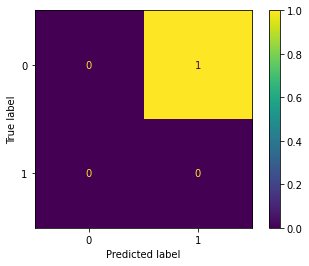

Precision: 0.000
Recall: 0.000
F1: 0.000
Accuracy: 0.000


In [7]:
X_train, X_test, y_train, y_test = generate_data(df1)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

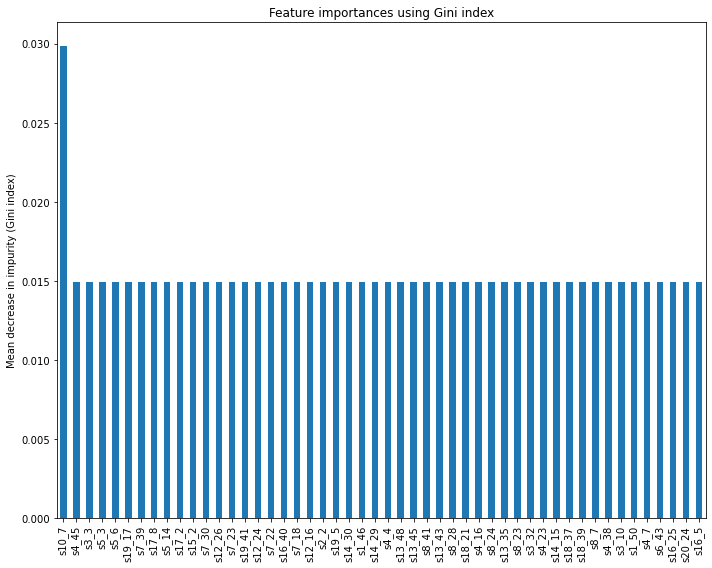

In [8]:
plot_gini_index(clf, X_train)

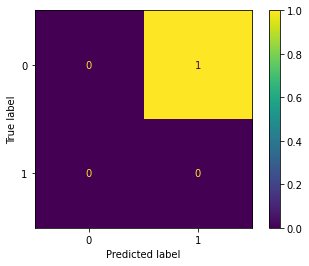

Precision: 0.000
Recall: 0.000
F1: 0.000
Accuracy: 0.000


In [9]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

## Only graphs with adjacency matrix

In [10]:
df2 = df.loc[:,0:nodes**2-1]
df2 = pd.concat([df2, label], axis=1)
df2.reset_index(drop=True)


KeyboardInterrupt



In [ ]:
X_train, X_test, y_train, y_test = generate_data(df2)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

In [ ]:
plot_gini_index(clf, X_train)

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

## Only graphs with graph2vec

In [ ]:
df3 = df.loc[:,'f1':'f16']
df3 = pd.concat([df3, label], axis=1)
df3.reset_index(drop=True)

In [ ]:
X_train, X_test, y_train, y_test = generate_data(df3)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

In [ ]:
plot_gini_index(clf, X_train)

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

# NMF

In [ ]:
import numpy as np
from NNetwork import NNetwork as nn
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics, model_selection
from tqdm import trange
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [ ]:
g2v_true = df3[df3['Concentrated'] == True].drop('Concentrated', axis = 1)
g2v_false = df3[df3['Concentrated'] == False].drop('Concentrated', axis = 1)

In [ ]:
g2v_true = g2v_true.sample(n=1936)
g2v_false = g2v_false.sample(n=1936)

In [ ]:
X_true = g2v_true.values
X_false = g2v_false.values

In [6]:
from kuramoto import Kuramoto
from kuramoto.db_metrics import *

In [7]:
df = gen_KM(
    nodes = 50,
    num_samples = 100,
    r = 500,
    edge_var = 'H',
    random_K = False,
    half_sync = False,
)

In [8]:
df

,s1_1,s1_2,s1_3,s1_4,s1_5,s1_6,s1_7,s1_8,s1_9,s1_10,...,s50_498,s50_499,s50_500,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Baseline,Synchronized
0,0.971097,0.966465,0.961723,0.956870,0.951909,0.946839,0.941662,0.936378,0.930990,0.925499,...,6.105026,6.107130,6.109231,371,50,9,19,3,0,0
1,2.574145,2.562307,2.550442,2.538551,2.526636,2.514702,2.502749,2.490782,2.478802,2.466813,...,2.680227,2.684518,2.688819,456,50,13,24,3,0,0
2,2.342819,2.366147,2.389480,2.412821,2.436169,2.459528,2.482898,2.506281,2.529680,2.553095,...,5.157233,5.154348,5.151486,654,50,19,34,2,0,0
3,3.264331,3.259305,3.254243,3.249148,3.244018,3.238855,3.233658,3.228429,3.223167,3.217872,...,0.804996,0.806132,0.807262,831,50,23,40,2,0,1
4,4.894451,4.879784,4.865078,4.850335,4.835556,4.820740,4.805891,4.791007,4.776092,4.761145,...,3.234840,3.232404,3.229996,744,50,23,35,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.005516,6.283101,6.277500,6.271898,6.266296,6.260695,6.255093,6.249492,6.243892,6.238292,...,1.629425,1.629237,1.629004,377,50,9,20,3,0,0
89,3.637617,3.640021,3.642429,3.644841,3.647255,3.649674,3.652095,3.654520,3.656947,3.659378,...,3.168983,3.169950,3.170907,272,50,8,15,3,0,0
90,2.143915,2.124521,2.105155,2.085817,2.066508,2.047232,2.027989,2.008782,1.989610,1.970477,...,3.205078,3.204067,3.203063,549,50,18,29,2,0,0
91,5.692215,5.686130,5.679969,5.673734,5.667425,5.661043,5.654586,5.648057,5.641455,5.634780,...,1.387888,1.418954,1.450189,732,50,21,35,2,0,0


In [9]:
sum(df['Baseline'])

3

In [10]:
sum(df['Synchronized'])

9

In [19]:
df_true = gen_KM(
    nodes = 25,
    num_samples = 100,
    r = 125,
    edge_var = 'H',
    random_K = False,
    half_sync = False,
)

In [20]:
df_true

,s1_1,s1_2,s1_3,s1_4,s1_5,s1_6,s1_7,s1_8,s1_9,s1_10,...,s25_123,s25_124,s25_125,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Baseline,Synchronized
0,1.776666,1.774061,1.771360,1.768563,1.765669,1.762677,1.759588,1.756402,1.753117,1.749734,...,1.070818,1.056470,1.042429,93,25,5,11,3,0,1
1,5.813011,5.808639,5.804231,5.799786,5.795304,5.790783,5.786224,5.781627,5.776990,5.772313,...,4.919080,4.915905,4.912801,300,25,24,24,1,0,0
2,5.112239,5.100046,5.087901,5.075806,5.063761,5.051768,5.039826,5.027936,5.016101,5.004320,...,6.253665,6.247367,6.241044,300,25,24,24,1,0,1
3,1.952660,1.952655,1.952624,1.952564,1.952474,1.952355,1.952204,1.952022,1.951808,1.951560,...,1.638765,1.632412,1.626177,296,25,22,24,2,1,1
4,4.790497,4.814538,4.838523,4.862445,4.886299,4.910080,4.933782,4.957399,4.980926,5.004358,...,5.785838,5.793552,5.801218,139,25,8,16,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1.786271,1.783053,1.779787,1.776475,1.773116,1.769711,1.766259,1.762761,1.759217,1.755628,...,2.348654,2.357143,2.365698,272,25,19,24,2,0,1
87,6.035058,6.044027,6.052890,6.061646,6.070295,6.078838,6.087273,6.095600,6.103820,6.111933,...,6.217993,6.225431,6.232715,89,25,4,11,3,0,0
88,5.422249,5.414043,5.405855,5.397685,5.389534,5.381402,5.373289,5.365194,5.357119,5.349062,...,0.467442,0.461831,0.456301,232,25,15,22,2,0,0
89,0.840891,0.847691,0.854488,0.861280,0.868067,0.874849,0.881625,0.888395,0.895158,0.901913,...,4.236932,4.226274,4.215558,294,25,22,24,2,0,1


In [21]:
sum(df_true['Baseline'])

4

In [22]:
sum(df_true['Synchronized'])

37

In [10]:
model = Kuramoto(coupling = 4, dt = 0.01, T = 18, n_nodes = 50, half_sync = False)

In [11]:
G = nx.newman_watts_strogatz_graph(50, 4, 0.65, seed = 42)

In [12]:
adj_mat = nx.to_numpy_array(G)

In [13]:
sim = model.run(adj_mat)

In [14]:
sim.T.shape

(1800, 50)

In [15]:
sim.T

array([[3.75773446, 5.43740372, 0.40355942, ..., 3.34877422, 5.53075203,
        0.21085359],
       [3.78050183, 5.44970922, 0.40567001, ..., 3.34921135, 5.54460092,
        0.19297895],
       [3.80369587, 5.46188941, 0.40763593, ..., 3.34990094, 5.55865981,
        0.17495949],
       ...,
       [4.75979277, 4.91792576, 4.96884157, ..., 4.42010807, 4.57270922,
        4.67157741],
       [4.75931965, 4.91745264, 4.96836845, ..., 4.41963495, 4.5722361 ,
        4.67110429],
       [4.75884653, 4.91697952, 4.96789533, ..., 4.41916183, 4.57176298,
        4.67063117]])

In [16]:
colors = sim.T[125]

In [17]:
def predict_concentration(colors):
            """
            computes width from a color list
            """
            #print(colors)
            ordered = list(np.pi - colors); ordered.sort()
            lordered = len(ordered)
            #print(ordered)
            threshold = np.pi
            if ordered == 0:
                assert("Empty array or logic error.")
            elif lordered == 1:
                return 0
            elif lordered == 2:
                dw = ordered[1]-ordered[0]
                if dw > threshold:
                    return 2*np.pi - dw
                else:
                    return dw
            else:
                widths = [2*np.pi+ordered[0]-ordered[-1]]
                for i in range(lordered-1):
                    widths.append(ordered[i+1]-ordered[i])
                #print(min(widths),'------')
                return np.abs(2*np.pi - max(widths))

In [18]:
predict_concentration(colors) < np.pi

False

In [19]:
colors = sim.T[-1]

In [38]:
predict_concentration(colors)

1.8269216858593378

In [20]:
predict_concentration(colors) < np.pi

True